# Tugas

**Mendeteksi orientasi teks dan jenis skrip**

Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.

**Tugas:**

**1. Persiapan Gambar:**

*   Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').
*   Tampilkan gambar asli menggunakan Python dan OpenCV.

In [1]:
!apt install tesseract-ocr
!apt-get install -y poppler-utils
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,581 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120899 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [5]:
IMG_DIR = '/content/drive/MyDrive/ML/JS12/'

In [6]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Text(0.5, 1.0, 'HITCHHIKERS ROTATED IMAGE')

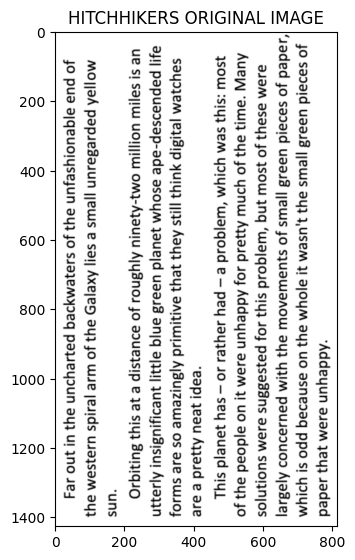

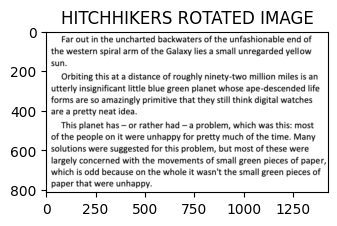

In [7]:
# Plot original image
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

#untuk rotasi image
image_rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

#pisah 3 warna jadi RGB
b,g,r = cv2.split(image_rotated)
rgb_img = cv2.merge([r,g,b])

#menampilkan original image
plt.figure(figsize=(8,8))
plt.subplot(121),plt.imshow(image)
plt.title('HITCHHIKERS ORIGINAL IMAGE')

#menampilkan rotated image
plt.figure(figsize=(8,8))
plt.subplot(122),plt.imshow(rgb_img)
plt.title('HITCHHIKERS ROTATED IMAGE')

In [8]:
# Preprocess image

gray = get_grayscale(image_rotated)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

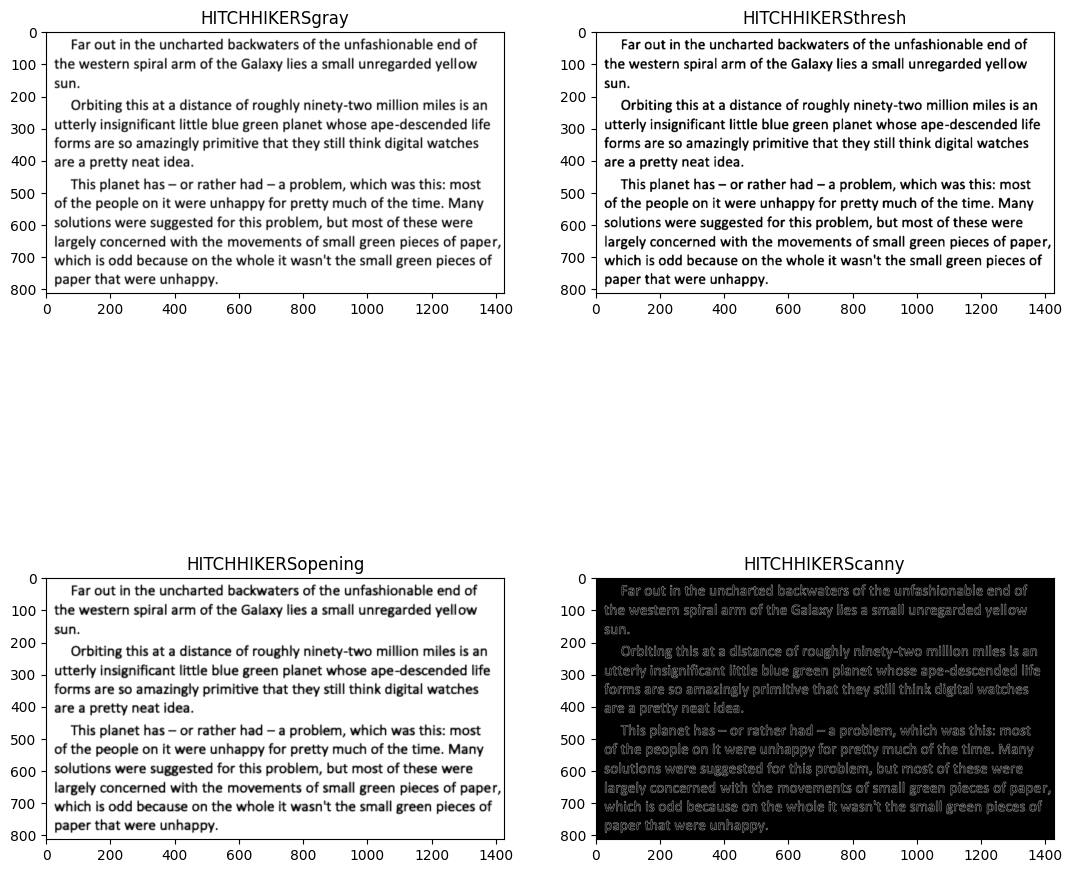

In [9]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('HITCHHIKERS' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

**2 Deteksi Orientasi dan Skrip:**


*   Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
*   Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).
*   Tampilkan hasil orientasi dan jenis skrip.

In [10]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
-
w os
- St wu + 2 a °
oe = @ YOoOg on
°o Yue ome cqw
T= wn Vo ESve @G
oY ota wo SF OS
— nw
vo Eos ceee¢oe
= oOo _ En y
a oO a a + = o oO
so Caf or coc UVa
o Oo pa
Co = 9 & S2o2°% Mw
S$ Ee0 ZS 3 Es
ws a x Stuaé
£5 Qwest feo OMG
c Sus Soe
S= #388 SER?
fs FSS EEBER
Sa vo; YV>m ae
Oo w ce OU G o
gy 2 +A2S aanvs
= a c
> $28 o5 85H
& > os |f ae
s = og o>u oO
x<~ © - © W oO Sc
oOo WM _- o> ac
= <= ~ Os
So 9 ae ~«§ SLE
cx a a ofo w
32 cat $528 y
e
ro So? fBagteca
Co ¢ SEF. ce grnse?re
Sec sbEewpgosutevs
<c & or in | F MSG
> es CN= gH Meas
w@ & SER ®SCHAVZ YD
© 38 Y= a@f£OoqgEPs
=- & - 2 wa
~~” cic crore Gg
coc Seger eaoys
—_ i. —_
+ Oo ~ayb oO 5 0%
a 4+ = £Lc ved ¥ x
on Sr Bet acVus
. ¥ BS2z>yvart*BZyglFert
oF .S5E*C SCL GSS
uw c OW ree Sd m=z a
25 B52 -¥ oka
$a S26 on Sa


-----------------------------------------


In [11]:
import cv2
import pytesseract
from PIL import Image

def get_text_orientation(image):
    # Convert NumPy array ke PIL Image
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    try:
        # pakai tesseract OCR untuk merotasi
        details = pytesseract.image_to_osd(pil_image)
        rotation_angle = float(details.split("\n")[1].split(":")[1])
        print(f"Sudut Rotasi dari OCR: {rotation_angle} derajat")
        return rotation_angle
    except Exception as e:
        print(f"Error: {e}")
        return None

# Get the rotation angle
rotation_angle = get_text_orientation(image)

if rotation_angle is not None:
    print(f"Sudut Rotasi: {rotation_angle} derajat")

Sudut Rotasi dari OCR: 270.0 derajat
Sudut Rotasi: 270.0 derajat


In [12]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image_rotated, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image_rotated, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image_rotated, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image_rotated, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
Far out in the 

In [13]:
import cv2
import pytesseract
from PIL import Image

def get_text_orientation(image):
    # Convert NumPy array ke PIL Image
    pil_image = Image.fromarray(cv2.cvtColor(image_rotated, cv2.COLOR_BGR2RGB))

    try:
        # pakai tesseract OCR untuk merotasi
        details = pytesseract.image_to_osd(pil_image)
        rotation_angle = float(details.split("\n")[1].split(":")[1])
        print(f"Sudut Rotasi dari OCR: {rotation_angle} derajat")
        return rotation_angle
    except Exception as e:
        print(f"Error: {e}")
        return None

# Get the rotation angle
rotation_angle = get_text_orientation(image_rotated)

if rotation_angle is not None:
    print(f"Sudut Rotasi: {rotation_angle} derajat")




Sudut Rotasi dari OCR: 0.0 derajat
Sudut Rotasi: 0.0 derajat
